# Symbols

Para situação de temperatura na saída da câmara de combustão de 1700 K, razão de
compressão no compressor de 20, razão de pressão no fan de 1,4; varie a razão de
passagem de zero (motor turbojato) até o máximo possível para estas condições de
operação ao nível do mar e início da decolagem (Mach 0). 

Em função da razão de passagem, apresente o comportamento do empuxo específico e consumo específico.

Admitindo que a vazão de ar para o motor de razão de passagem igual zero (turbojato)
é 100 kg/s, determine qual a vazão total de ar (total) e o consumo de combustível para
as versões com razão de passagem diferente de zero de tal forma a propiciar o mesmo
empuxo que a versão turbojato.

In [7]:
import model_reference as mf
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [6]:
values = {
    'pa': 101.3, # kPa
    'ta': 288.3, # K
    'n_d': 0.97, # Difuser (Inlet)
    'n_f': 0.85, # Fan
    'n_c': 0.85, # High Pressure Compressor
    'n_b': 1.0,  # Combustion Chamber
    'n_t': 0.9,  # Compressor Turbine
    'n_tf': 0.9, # Fan turbine
    'n_n': 0.98, 
    'n_nf': 0.98,
    'gamma_d': 1.4,   # Difuser (Inlet)
    'gamma_f': 1.4,   # Fan
    'gamma_c': 1.37,  # High Pressure Compressor
    'gamma_b': 1.35,  # Combustion Chamber
    'gamma_t': 1.33,  # Compressor Turbine
    'gamma_tf': 1.33, # Fan turbine
    'gamma_n': 1.36,
    'gamma_nf': 1.40,
    'prc': 20, # Crompressor Pressure Ratio
    'prf': 1.4,  # Fan Pressure Ratio
    'bypass_ratio': 0,
    'pc_fuel': 45000, # kJ/kg
    'cp_fuel': 1.110, # kJ/(kg*K)
    'r': 288.3,
    't04': 1700, # K (Combustion Chamber Temperature)
    'mach': 0.0, # Aircraft speed
    'mass_flow': 100.0, # kg/s (Inlet mass flow)
    }

summarise_target = [
    'n1',
    'hot_mass_flow',
    'hot_specific_thrust',
    'cold_mass_flow',
    'cold_specific_thrust',
    'bypass_ratio', 
    'TSFC',
    'thrust_total',
    'specific_thrust',
    ]

results = pd.DataFrame()

for bpr in np.arange(0, 30, 1):
    values["bypass_ratio"] = bpr
    turbofan = mf.TurboFan(values)

    results[str(bpr)] = (
        turbofan.sumarise().
        append(turbofan.sumarise_results()).
        loc[summarise_target]
        )


results

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
n1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
hot_mass_flow,99.923311,49.961655,33.307770,24.980828,19.984662,16.653885,14.274759,12.490414,11.102590,9.992331,...,4.758253,4.541969,4.344492,4.163471,3.996932,3.843204,3.700863,3.568690,3.445631,3.330777
hot_specific_thrust,986.681923,942.118641,895.031245,844.964915,791.314212,733.242918,669.538774,598.323470,516.388257,417.306499,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
cold_mass_flow,0.000000,49.961655,66.615540,74.942483,79.938648,83.269426,85.648552,87.432897,88.820721,89.930980,...,95.165058,95.381342,95.578819,95.759839,95.926378,96.080106,96.222447,96.354621,96.477679,96.592534
cold_specific_thrust,0.000000,241.798101,483.596203,725.394304,967.192405,1208.990507,1450.788608,1692.586709,1934.384811,2176.182912,...,4835.962027,5077.760128,5319.558229,5561.356331,5803.154432,6044.952533,6286.750635,6528.548736,6770.346837,7012.144939
bypass_ratio,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000
TSFC,0.023609,0.019676,0.016897,0.014834,0.013247,0.011994,0.010986,0.010168,0.009505,0.008982,...,0.004817,0.004588,0.004379,0.004189,0.004014,0.003854,0.003705,0.003568,0.003441,0.003322
thrust_total,98.592524,59.150440,45.919006,39.228873,35.143161,32.345732,30.267162,28.614416,27.209929,25.915005,...,23.010730,23.063027,23.110777,23.154547,23.194816,23.231987,23.266405,23.298364,23.328120,23.355891
specific_thrust,0.986682,1.183917,1.378627,1.570359,1.758507,1.942233,2.120327,2.290910,2.450773,2.593489,...,4.835962,5.077760,5.319558,5.561356,5.803154,6.044953,6.286751,6.528549,6.770347,7.012145


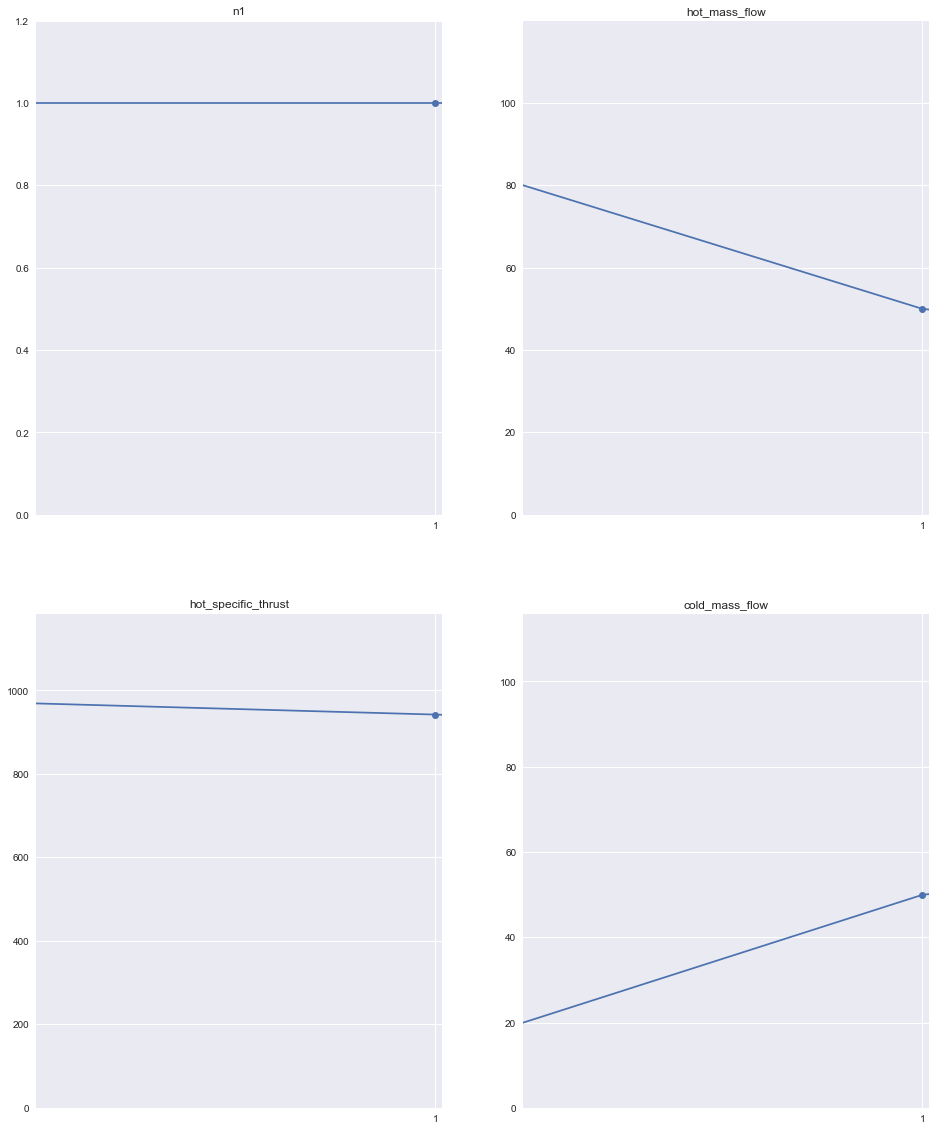

In [9]:
cols = 2
rows = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))
aux = 0
for i in range(0, rows):
    for j in range(0, cols):
        plt.sca(ax[i, j])
        plt.plot(results.iloc[aux], marker='o')
        plt.axis([0.4,1.01,0,max(results.iloc[aux])*1.2])
        plt.title(results.index[aux])
        aux += 1


In [6]:
turbofan.sumarise_results()

,1
TSFC,0.023609
cold_mass_flow,0.000000
cold_specific_thrust,0.000000
fuel_consumption,2.327641
hot_mass_flow,99.923311
hot_specific_thrust,986.681923
mass_flow,99.923311
specific_thrust,0.986682
thrust_total,98.592524
